In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Loading and Analysing Data

In [41]:
data = pd.read_csv('./Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
data.shape

(506, 14)

The Boston data frame has 506 rows and 14 columns.

**This data frame contains the following columns:**

***crim:*** Per capita crime rate by town.

**zn**: Proportion of residential land zoned for lots over 25,000 sq.ft.

***indus:*** Proportion of non-retail business acres per town.

***chas:*** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

***nox:*** Nitrogen oxides concentration (parts per 10 million).

***rm:*** Average number of rooms per dwelling.

***age:*** proportion of owner-occupied units built prior to 1940.

***dis:*** Weighted mean of distances to five Boston employment centres.

***rad:*** Index of accessibility to radial highways.

***tax:*** Full-value property-tax rate per \$10,000.

***ptratio:*** Pupil-teacher ratio by town.

***black:*** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

***lstat:*** Lower status of the population (percent).

***medv:*** Median value of owner-occupied homes in \$1000s.

In [43]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


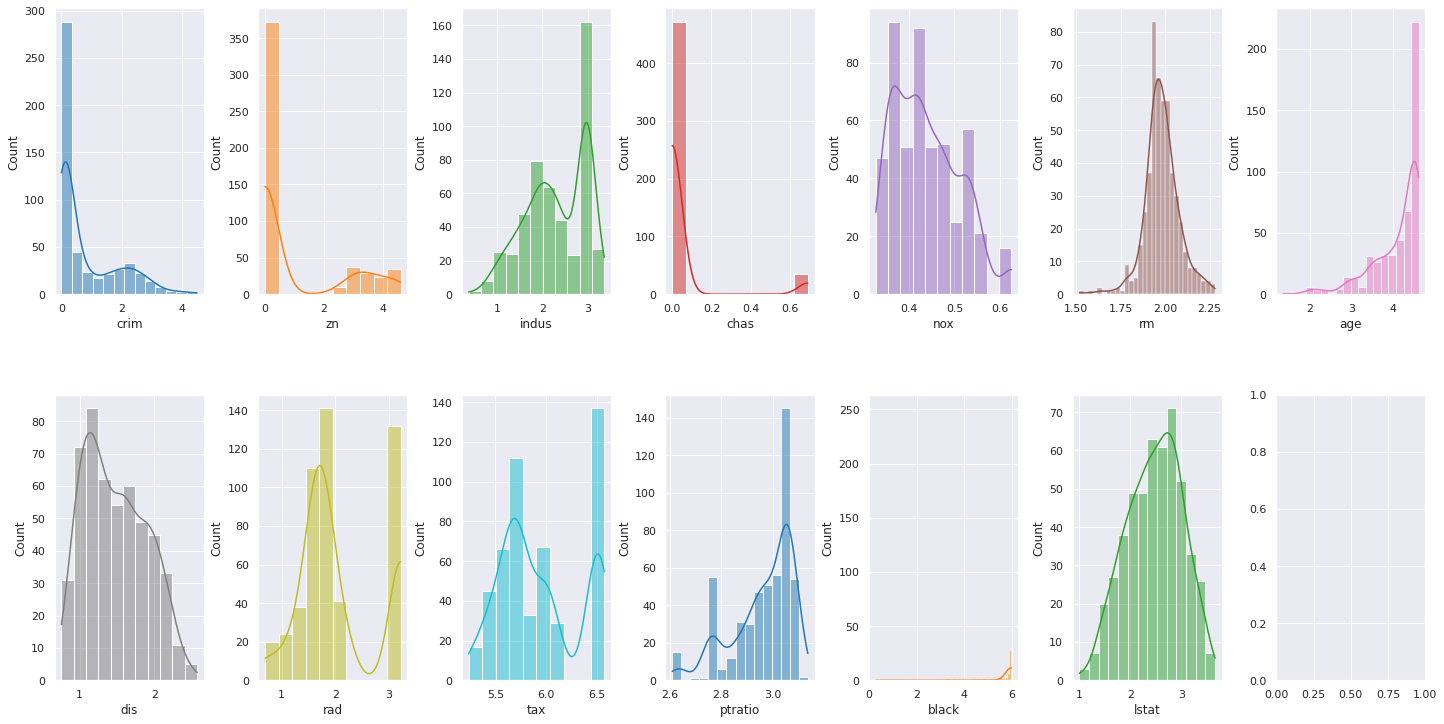

In [44]:
color = sns.color_palette("tab10")
columns = data.columns
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for k in range(len(columns)-1):
    sns.histplot(data[columns[k]].apply(lambda x:np.log1p(x)), ax=axs[k],kde=True,color=color[k%10])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [45]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


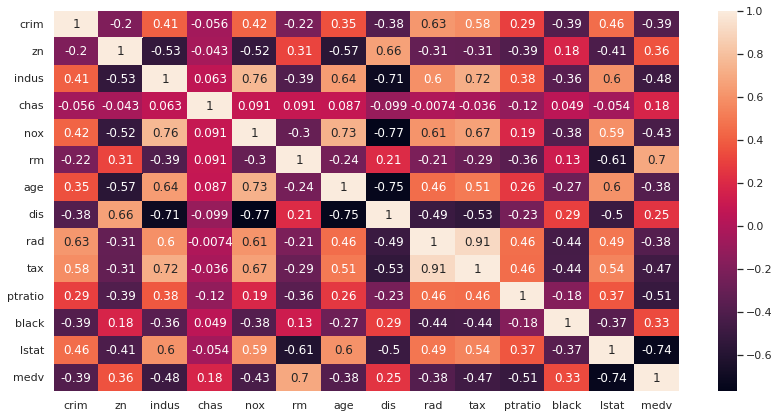

In [46]:
plt.figure(figsize = (14,7))
sns.heatmap(data.corr(), annot = True)

In [47]:
type(data.corr())

pandas.core.frame.DataFrame

##Adding the target variable to our DataFrame

In [48]:
y = (data['crim'] > 0.256510) #median of crim data = 0.256510
print(y, "\n\n", "Total Yes: " + str(sum(y)))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool 

 Total Yes: 253


In [49]:
data['target'] = y #Adding y to the DataFrame. This will be out target variable
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,False


In [50]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

##Split, Train and Test for LDA

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

cl = LDA()
cl.fit(X_train, y_train)
y_pred = cl.predict(X_test)

In [71]:
y_pred

array([ True,  True, False, False, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True])

In [72]:
y_test

array([ True,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True])

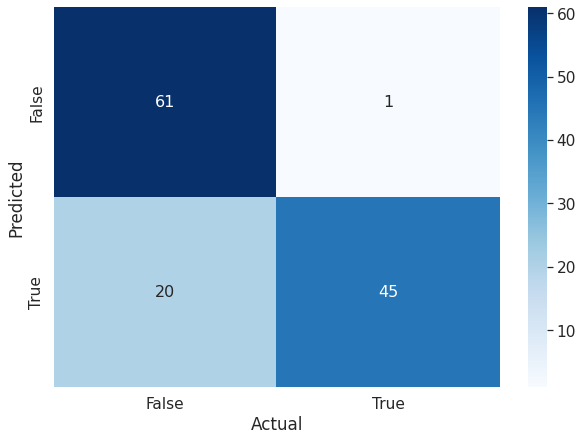

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

lin_cm_kbest = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

lin_cm_kbest.index.name = 'Predicted'
lin_cm_kbest.columns.name = 'Actual'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(lin_cm_kbest, cmap="Blues", annot=True,annot_kws={"size": 16})

In [74]:
type(cm)

numpy.ndarray

In [75]:
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[0][1]))

0.8346456692913385


In [76]:
from sklearn.model_selection import KFold, cross_val_score  # K-fold cross validation

k_fold = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val_score(LDA(), X_test, y_test, cv=k_fold ).mean()

0.8033846153846154

##Train and Test on Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

cl2 = LogisticRegression() #Not coverging. See the below two alternatives.
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [78]:
from sklearn.linear_model import LogisticRegression

cl2 = LogisticRegression(max_iter=2500) #2500 is like hit and trail. Start with 100 then check for 500 and so on.
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)

In [79]:
#Another Alternative. Comment out and can try this alternative too!!
"""
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
Y = data.iloc[:,-1]
X = data.iloc[:, :-1]
X_ = std_scaler.fit_transform(X)

X_ = pd.DataFrame(X_, columns=X.columns)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size = 0.25)



from sklearn.linear_model import LogisticRegression

cl2 = LogisticRegression()
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\n\nstd_scaler = StandardScaler()\nY = data.iloc[:,-1]\nX = data.iloc[:, :-1]\nX_ = std_scaler.fit_transform(X)\n\nX_ = pd.DataFrame(X_, columns=X.columns)\n\n\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size = 0.25)\n\n\n\nfrom sklearn.linear_model import LogisticRegression\n\ncl2 = LogisticRegression()\ncl2.fit(X_train, y_train)\ny_pred = cl2.predict(X_test)\n'

In [80]:
y_pred

array([ True,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True])

In [81]:
y_test

array([ True,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True])

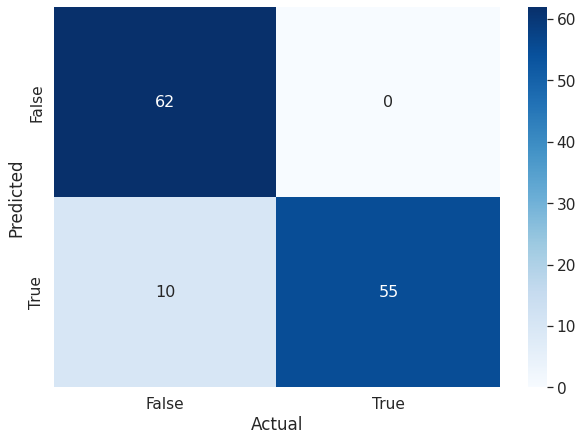

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

lin_cm_kbest = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

lin_cm_kbest.index.name = 'Predicted'
lin_cm_kbest.columns.name = 'Actual'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(lin_cm_kbest, cmap="Blues", annot=True,annot_kws={"size": 16})

In [83]:
#Accuracy score
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[0][1]))

0.9212598425196851


In [84]:
# K-fold cross validation

from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val_score(LogisticRegression(max_iter=2500), X_test, y_test, cv=k_fold ).mean()

0.8427692307692307

In [85]:
#print(cm)

In [86]:
#sum(y_test)